In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.models import load_model

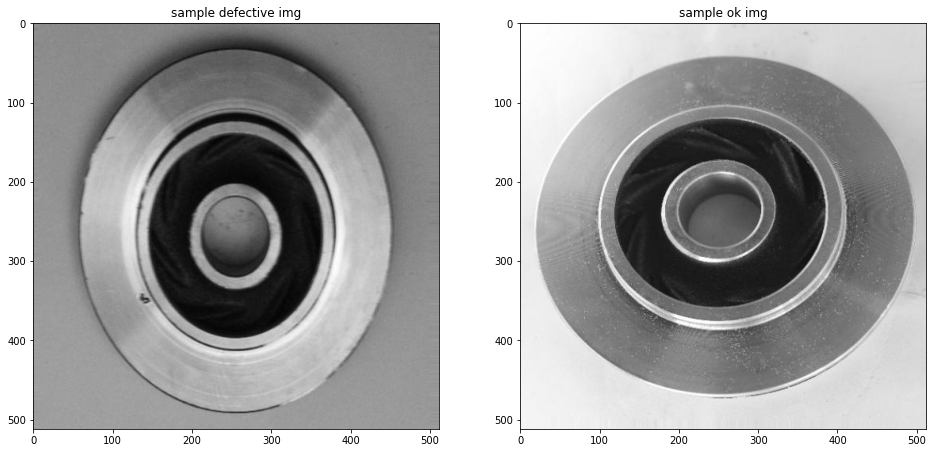

In [14]:
# reading a sample image and resizing
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(16,8))

img = cv.imread('/content/drive/MyDrive/casting_dataset/casting_512x512/casting_512x512/def_front/cast_def_0_1053.jpeg')
ax1.title.set_text('sample defective img')
ax1.imshow(img)


img = cv.imread('/content/drive/MyDrive/casting_dataset/casting_512x512/casting_512x512/ok_front/cast_ok_0_1082.jpeg')
ax2.title.set_text('sample ok img')
ax2.imshow(img)

(50, 50)

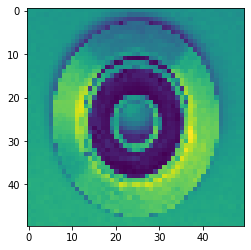

In [9]:
# reading a sample image and resizing
img = cv.imread('/content/drive/MyDrive/casting_dataset/casting_512x512/casting_512x512/def_front/cast_def_0_1053.jpeg')
img_resized = cv.resize(img, (50, 50),interpolation = cv.INTER_LINEAR)
gray = cv.cvtColor(img_resized,cv.COLOR_BGR2GRAY)
plt.imshow(gray)
gray.shape

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
train_path = '/content/drive/MyDrive/casting_dataset/casting_data/casting_data/train'
test_path = '/content/drive/MyDrive/casting_dataset/casting_data/casting_data/test'
label_dict = ['def_front','ok_front']

In [16]:
# Reading training data
X_train = []
y_train = []
for folder in os.listdir(train_path):
    folder_path = os.path.join(train_path,folder)
    print(f'Reading images in folder {folder}...')
    for image in os.listdir(folder_path):
        img = cv.imread(os.path.join(folder_path,image))
        gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
        img_resized = cv.resize(gray, (50, 50),interpolation = cv.INTER_LINEAR)
        image_norm = img_resized/255.0
        X_train.append(image_norm)
        y_train.append(label_dict.index(folder))
    print('Done...')

Reading images in folder def_front...
Done...
Reading images in folder ok_front...
Done...


In [17]:
# Reading test data
X_test = []
y_test = []
for folder in os.listdir(test_path):
    folder_path = os.path.join(test_path,folder)
    print(f'Reading images in folder {folder}...')
    for image in os.listdir(folder_path):
        img = cv.imread(os.path.join(folder_path,image))
        gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
        img_resized = cv.resize(gray, (50, 50),interpolation = cv.INTER_LINEAR)
        image_norm = img_resized/255.0
        X_test.append(image_norm)
        y_test.append(label_dict.index(folder))
    print('Done...')

Reading images in folder def_front...
Done...
Reading images in folder ok_front...
Done...


In [18]:
# splitting data to generate validation dataset
X, X_test, y, y_test = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [19]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_val = np.asarray(X_val)
y_val = np.asarray(y_val)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [20]:
# Expand dimension
X_train = X_train.reshape(X_train.shape[0],50,50,1)
X_test = X_test.reshape(X_test.shape[0],50,50,1)
X_val = X_val.reshape(X_val.shape[0],50,50,1)

In [13]:
# model = Sequential()
# model.add(Conv2D(filters=80,kernel_size=(3,3),activation='relu', input_shape=(150,150,1)))
# model.add(MaxPooling2D(2,2))
# model.add(Conv2D(filters=160,kernel_size=(3,3),activation='relu'))
# model.add(MaxPooling2D(2,2))
# # model.add(tf.keras.Input(shape=(6400,)))
# model.add(Flatten())
# model.add(Dense(160, activation='relu'))
# # model.add(Dropout(0.25,seed = 42))
# model.add(Dense(80, activation='relu'))
# model.add(Dense(10, activation='softmax'))

# model.compile(optimizer='adam',
#                 loss='sparse_categorical_crossentropy',
#                 metrics=['accuracy'])

In [25]:
# Defining neural network setup
model = Sequential()
model.add(Conv2D(filters=80,kernel_size=(3,3),activation='relu', input_shape=(50,50,1)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 80)        800       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 80)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 46080)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                460810    
Total params: 461,610
Trainable params: 461,610
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Training the model
%%time
nr_epochs = 3
model.fit(X_train,y_train,batch_size=18,epochs = nr_epochs,validation_data=(X_val,y_val))

Epoch 1/3
236/236 [==============================] - 12s 47ms/step - loss: 0.5111 - accuracy: 0.7377 - val_loss: 0.3680 - val_accuracy: 0.8343
Epoch 2/3
236/236 [==============================] - 12s 49ms/step - loss: 0.2995 - accuracy: 0.8820 - val_loss: 0.5966 - val_accuracy: 0.6478
Epoch 3/3
236/236 [==============================] - 11s 48ms/step - loss: 0.2640 - accuracy: 0.8975 - val_loss: 0.2119 - val_accuracy: 0.9200
CPU times: user 59.5 s, sys: 1.31 s, total: 1min
Wall time: 41.4 s


In [28]:
# Evaluating the model using test data
model.evaluate(X_test, y_test)

42/42 [==============================] - 1s 22ms/step - loss: 0.2046 - accuracy: 0.9239


[0.20459671318531036, 0.9238884449005127]

In [29]:
# checking results at random
y_pred = model.predict(X_test)
classes = np.argmax(y_pred,axis=1)
for number in range(10,20):
      print(f'Actual value: {y_test[number]} vs predicted value: {classes[number]}')

Actual value: 1 vs predicted value: 0
Actual value: 0 vs predicted value: 0
Actual value: 0 vs predicted value: 0
Actual value: 0 vs predicted value: 0
Actual value: 0 vs predicted value: 0
Actual value: 1 vs predicted value: 1
Actual value: 0 vs predicted value: 0
Actual value: 1 vs predicted value: 1
Actual value: 0 vs predicted value: 0
Actual value: 0 vs predicted value: 0


In [71]:
#saving the model

# serialize model to JSON
model_json = model.to_json()
with open("/content/drive/MyDrive/casting_model3/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/casting_model3/model.h5")
print("Saved model to disk")

Saved model to disk
